<a href="https://colab.research.google.com/github/jyoti3011/Attrition_GreenDestination/blob/main/Copy_of_Assignment_GreenDestination_Attrition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#  1. Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline
sns.set(color_codes=True)
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#2. load the csv file

df = pd.read_csv('/content/greendestination (1).csv')

In [ ]:
# 3. print the head of the dataframe

df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
# 4.Configure plots
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

In [ ]:
# 5. Basic Info

df.info()
df.describe()
df['Attrition'].value_counts(normalize=True) * 100

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

,proportion
Attrition,
No,83.877551
Yes,16.122449


In [ ]:
#  6. Missing Values

df.isnull().sum()

,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0
EmployeeNumber,0


Text(0.5, 1.0, 'Attrition Distribution')

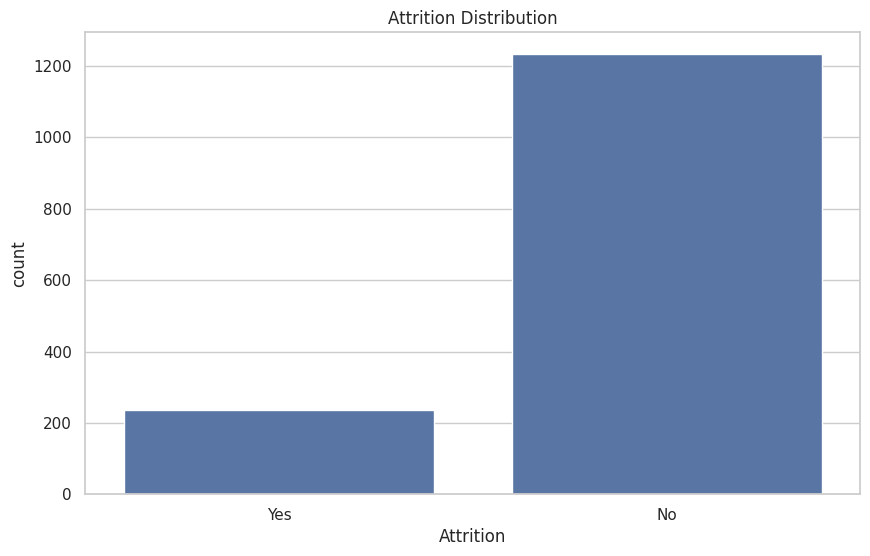

In [ ]:
#  7. Attrition Distribution

sns.countplot(x='Attrition', data=df)
plt.title('Attrition Distribution')

Text(0.5, 1.0, 'Age vs. Attrition')

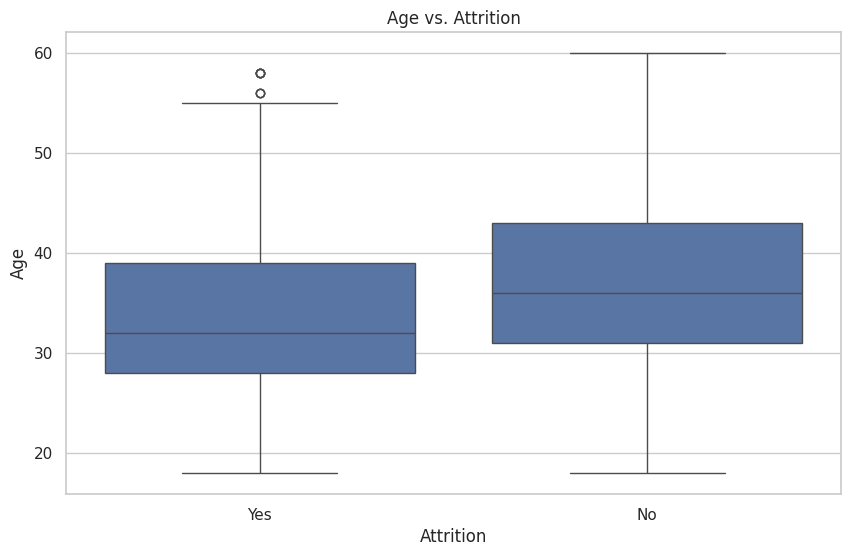

In [ ]:
#  8. Attrition vs. Age

sns.boxplot(x='Attrition', y='Age', data=df)
plt.title("Age vs. Attrition")

Text(0.5, 1.0, 'Daily Rate vs. Attrition')

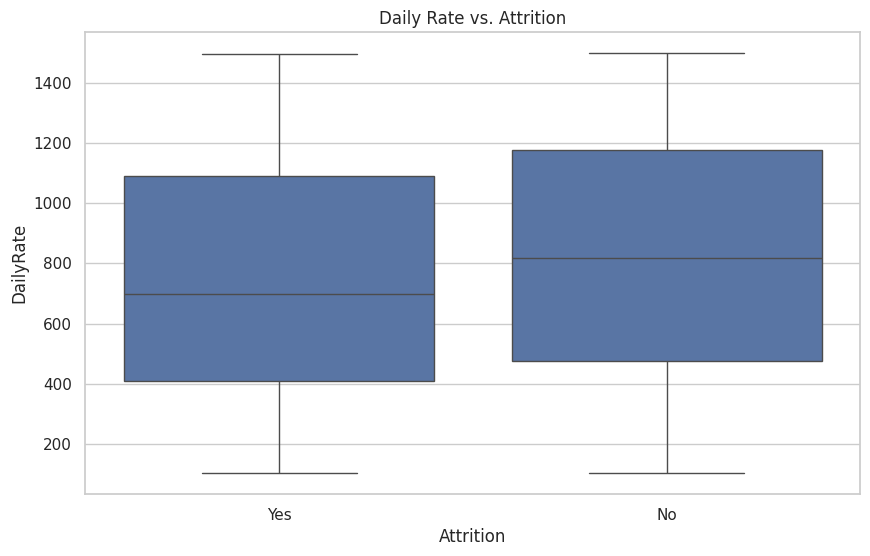

In [ ]:
# 9. Attrition by Salary (DailyRate)

sns.boxplot(x='Attrition', y='DailyRate', data=df)
plt.title("Daily Rate vs. Attrition")

Text(0.5, 1.0, 'Years at Company vs. Attrition')

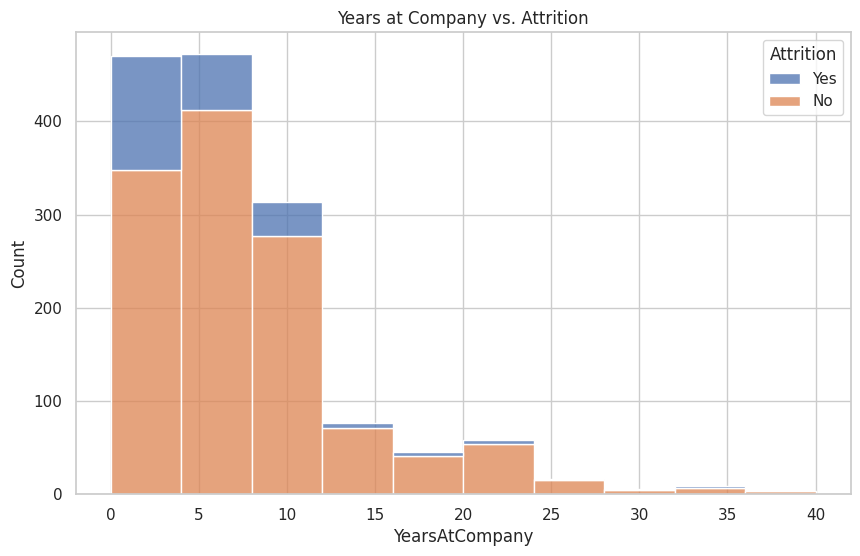

In [ ]:
# 10.Attrition vs. Years at Company

sns.histplot(data=df, x='YearsAtCompany', hue='Attrition', multiple='stack', bins=10)
plt.title("Years at Company vs. Attrition")

([0, 1, 2],
 [Text(0, 0, 'Sales'),
  Text(1, 0, 'Research & Development'),
  Text(2, 0, 'Human Resources')])

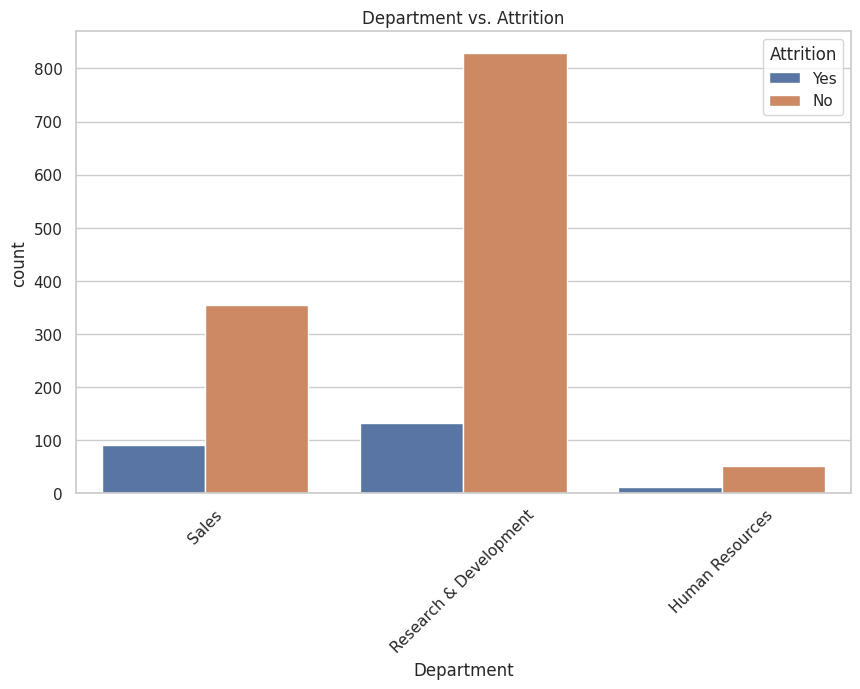

In [ ]:
# 11. Attrition by Department

sns.countplot(x='Department', hue='Attrition', data=df)
plt.title("Department vs. Attrition")
plt.xticks(rotation=45)

Text(0.5, 1.0, 'Business Travel vs. Attrition')

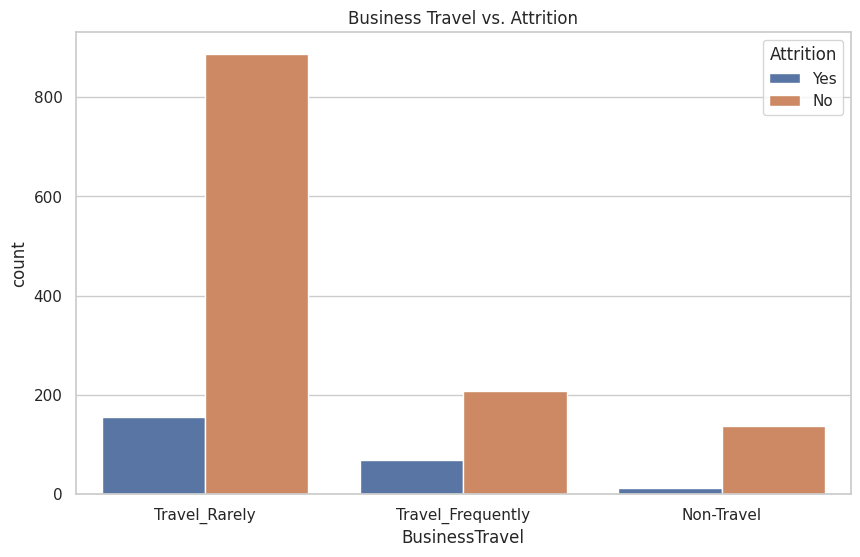

In [ ]:
# 12.  Attrition by Business Travel

sns.countplot(x='BusinessTravel', hue='Attrition', data=df)
plt.title("Business Travel vs. Attrition")

Text(0.5, 1.0, 'Correlation with Attrition')

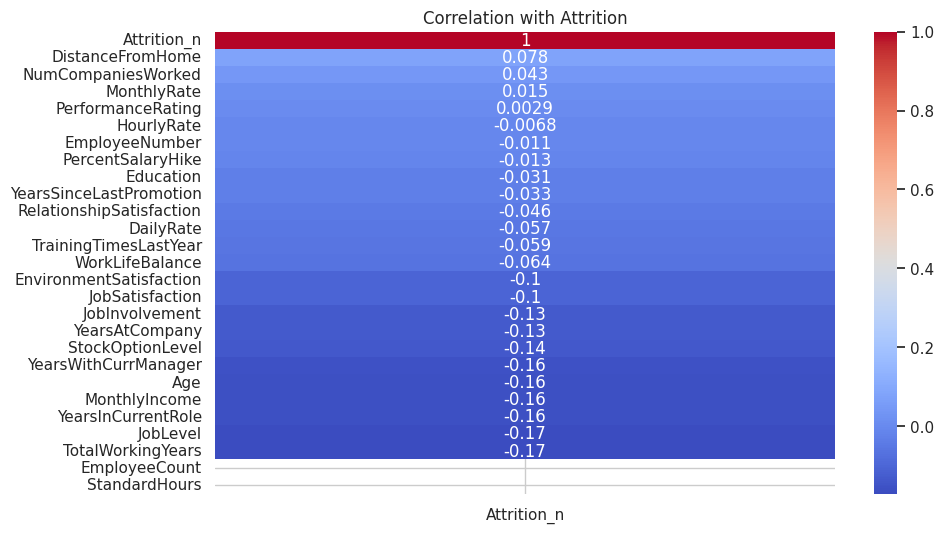

In [ ]:
# 13. Correlation Heatmap


# Convert Attrition to numeric
df['Attrition_n'] = df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)

numeric_df = df.select_dtypes(include=np.number)
corr = numeric_df.corr()
sns.heatmap(corr[['Attrition_n']].sort_values(by='Attrition_n', ascending=False), annot=True, cmap='coolwarm')
plt.title("Correlation with Attrition")

In [ ]:
# Summery


# 📝 Summary Points to Include in Report
# Attrition Rate: e.g., 16% of employees have left the company.

# Younger employees (under 30) have higher attrition.

# Employees with fewer years at the company (<2) are more likely to leave.

# Low salary (DailyRate) shows a correlation with higher attrition.

# Departments and roles show varying attrition trends.

# Frequent business travelers tend to leave more often.


